In [1]:
import numpy as np
import matplotlib.pyplot as plt

import PIL
from PIL import Image,ImageOps

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input

print(np.__version__)
print(tf.__version__)


KeyboardInterrupt: 

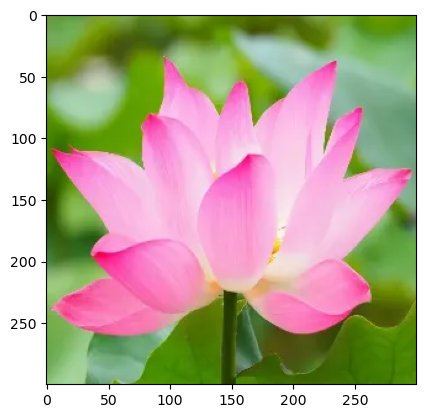

In [69]:
img_width = 300
img_height = 300

img = Image.open('lotus.png')
plt.imshow(img)


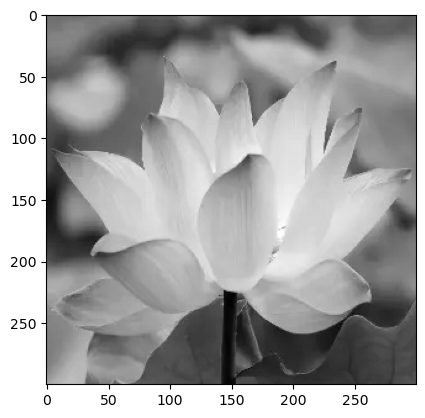

In [70]:
gray = ImageOps.grayscale(img)
_ = plt.imshow(gray, cmap='gray')

In [71]:
def convolve(image, kernel):
    ih, iw = image.shape
    kh, kw = kernel.shape
    
    out_h = ih - kh + 1
    out_w = iw - kw + 1
    
    output = np.zeros((out_h, out_w))
    
    for i in range(out_h):
        for j in range(out_w):
            r = image[i:i+kh, j:j+kw]
            output[i,j] = np.sum(r*kernel)
    
    return output

In [72]:
def sobel(image):
    sx = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]
                   ])
    sy = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]
                   ])
    Gx = convolve(image, sx)
    Gy = convolve(image, sy)
    
    G = np.sqrt(np.add(np.multiply(Gx,Gx), np.multiply(Gy,Gy)))
    
    return G, Gx, Gy

In [73]:
input_img = np.array(gray).reshape((img_width, img_height))
Gnp, Gxnp, Gynp = sobel(input_img)


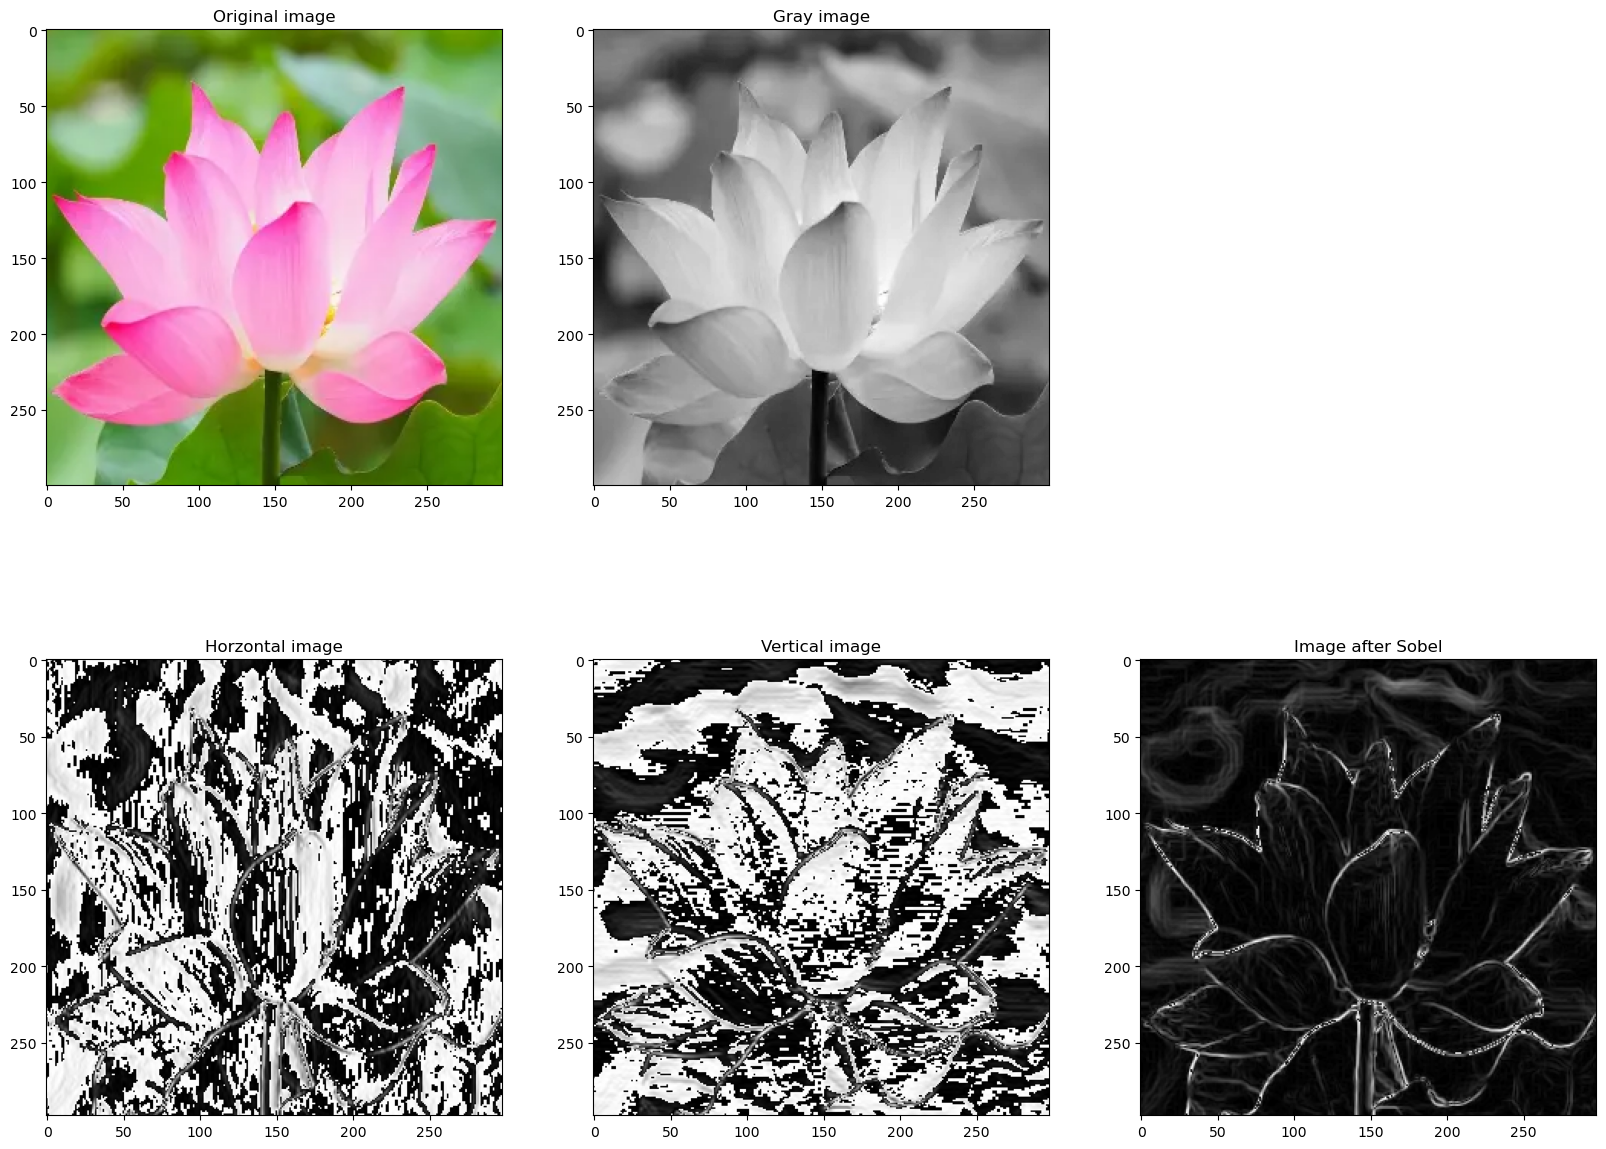

In [74]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
plt.imshow(img)
plt.title('Original image')

plt.subplot(2,3,2)
plt.imshow(gray, cmap='gray')
plt.title('Gray image')

plt.subplot(2,3,4)
plt.imshow(Gxnp.astype('uint8'), cmap='gray')
plt.title('Horzontal image')

plt.subplot(2,3,5)
plt.imshow(Gynp.astype('uint8'), cmap='gray')
plt.title('Vertical image')

plt.subplot(2,3,6)
plt.imshow(Gnp.astype('uint8'), cmap='gray')
plt.title('Image after Sobel')

plt.show()

In [75]:
def h_grad(shape, dtype=None):
  grad=np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]
                    ]).reshape((3,3,1,1))
  return keras.backend.variable(grad, dtype='float32')

def v_grad(shape, dtype=None):
  grad=np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]
                    ]).reshape((3,3,1,1))
  return keras.backend.variable(grad, dtype='float32')

def conv_sobel(img,strides, padding):
  input_layer = Input(shape=(img_width, img_height, 1))
  hconv = layers.Conv2D(filters=1, kernel_size=3,
                        kernel_initializer=h_grad,
                      strides=strides, padding=padding)

  vconv = layers.Conv2D(filters=1, kernel_size=3,
                        kernel_initializer=v_grad,
                      strides=strides, padding=padding)

  modelh= Sequential()
  modelh.add(input_layer)
  modelh.add(hconv)

  modelv= Sequential([input_layer,vconv])

  outshape = modelh.layers[0].output.shape[1:]
  Gh = modelh.predict(img).reshape(outshape)
  Gv = modelh.predict(img).reshape(outshape)
  G = np.sqrt(np.add(np.multiply(Gh,Gh),np.multiply(Gv,Gv)))

  return G

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


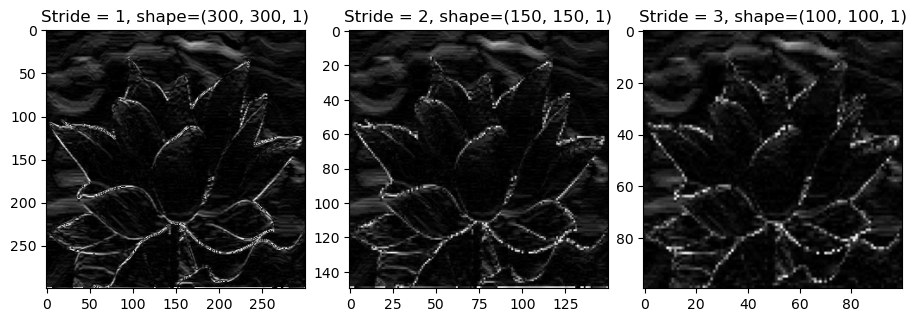

In [76]:
input_img = np.array(gray).reshape((1,img_width,img_height,1))

fig, axs = plt.subplots(1,3, figsize=(9,19), constrained_layout=True)


for i, ax in enumerate(axs.flat):
  out_img = conv_sobel(img = input_img, padding='same', strides=i+1).astype('uint8')
  ax.imshow(out_img, cmap='gray')
  ax.set_title(f'Stride = {i+1}, shape={out_img.shape}')


# Color Image

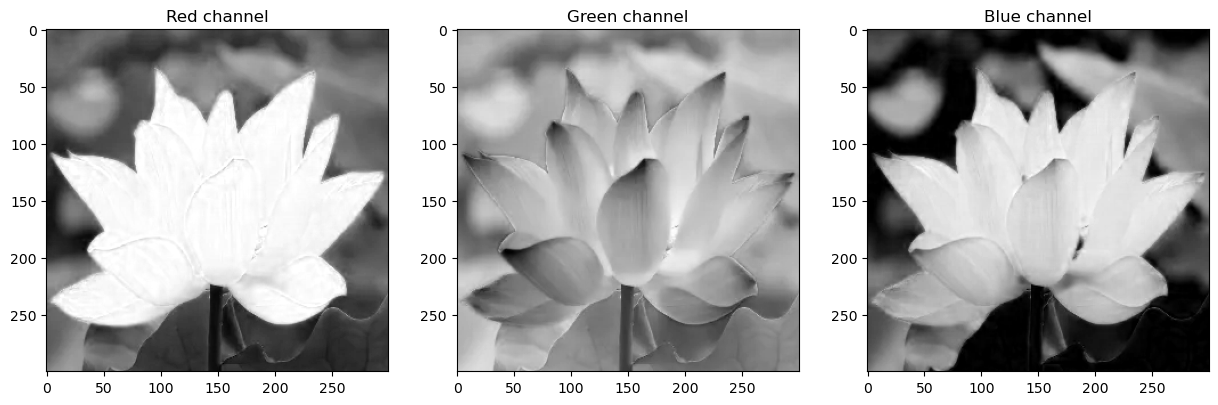

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming img is a valid RGB image
arr = np.array(img)
channel_r = arr[:, :, 0]
channel_g = arr[:, :, 1]
channel_b = arr[:, :, 2]

channels = [channel_r, channel_g, channel_b]
names = ['Red channel', 'Green channel', 'Blue channel']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    axs[i].imshow(channels[i], cmap='gray')
    axs[i].set_title(names[i])

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


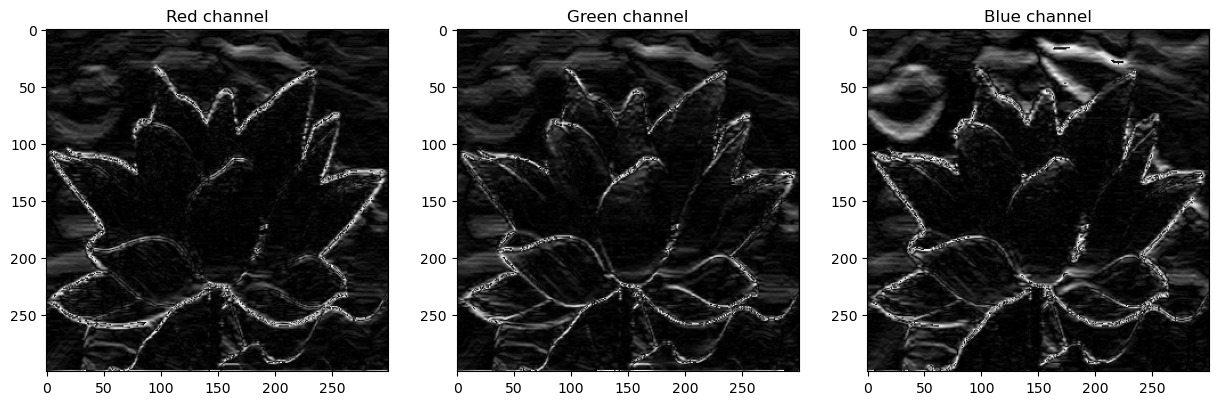

In [79]:
plt.figure(figsize=(15, 5))

out_all = []

for i in range(3):
    inp_img = channels[i].reshape((1, img_width, img_height, 1))
    out_img = conv_sobel(img=inp_img, strides=1, padding='same').astype('uint8')
    
    out_all.append(out_img) 
     
    plt.subplot(1, 3, i+1)
    plt.imshow(out_img, cmap='gray')
    plt.title(names[i])
    
    

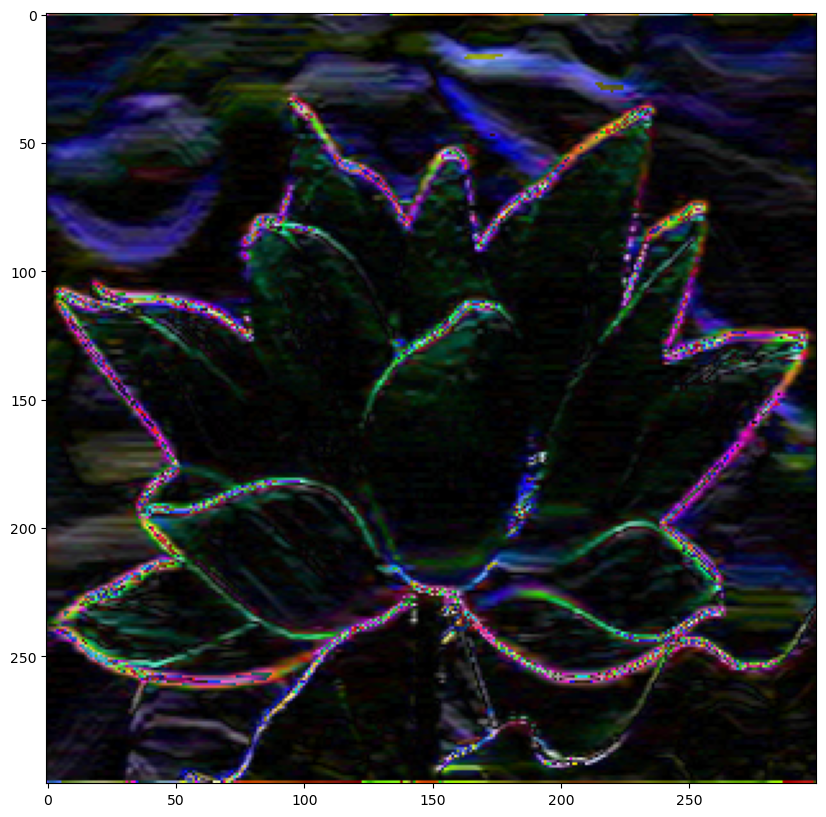

In [80]:
out_color = np.dstack((out_all[0], out_all[1], out_all[2]))
plt.figure(figsize=(15, 10))
plt.imshow(out_color)